In [39]:
import pandas as pd
import numpy as np
import re
import string
import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package stopwords to C:\Users\Raj Nandini
[nltk_data]     Dora\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Raj Nandini
[nltk_data]     Dora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
!pip install tensorflow
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report

## Load Dataset 

In [6]:
fakenews = pd.read_csv(r"C:\Users\Raj Nandini Dora\Downloads\archive\Fake.csv")
truenews = pd.read_csv(r"C:\Users\Raj Nandini Dora\Downloads\archive\True.csv")

In [7]:
fakenews['label']=0

In [8]:
fakenews.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
truenews['label']=1
truenews.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [10]:
truenews.drop(columns=['title','subject','date'],inplace=True)
fakenews.drop(columns=['title','subject','date'],inplace=True)

In [11]:
truenews.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [12]:
fakenews.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [13]:
News= pd.concat([fakenews, truenews], ignore_index=True)
News = News.sample(frac=1, random_state=42).reset_index(drop=True)
News.head()

,text,label
0,"21st Century Wire says Ben Stein, reputable pr...",0
1,WASHINGTON (Reuters) - U.S. President Donald T...,1
2,(Reuters) - Puerto Rico Governor Ricardo Rosse...,1
3,"On Monday, Donald Trump once again embarrassed...",0
4,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",1


In [14]:
News.shape


(44898, 2)

In [15]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


## Data Cleaning 

In [16]:

News.isnull().sum()


text     0
label    0
dtype: int64

In [17]:
News.duplicated().sum()

6251

In [18]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

## Preprocess the text

In [20]:

# Define stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation and digits
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)      # remove digits

    # 3. Tokenize
    tokens = word_tokenize(text)

    # 4. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # 5. Join back into a string
    cleaned_text = " ".join(tokens)
    return cleaned_text

# Apply the cleaning function to the 'text' column
News['text'] = News['text'].apply(clean_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Raj Nandini Dora/nltk_data'
    - 'C:\\Users\\Raj Nandini Dora\\anaconda3\\nltk_data'
    - 'C:\\Users\\Raj Nandini Dora\\anaconda3\\share\\nltk_data'
    - 'C:\\Users\\Raj Nandini Dora\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Raj Nandini Dora\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [21]:
print(News['text'].head())

0    21st Century Wire says Ben Stein, reputable pr...
1    WASHINGTON (Reuters) - U.S. President Donald T...
2    (Reuters) - Puerto Rico Governor Ricardo Rosse...
3    On Monday, Donald Trump once again embarrassed...
4    GLASGOW, Scotland (Reuters) - Most U.S. presid...
Name: text, dtype: object


In [25]:
X = News['text']
y = News['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
max_words = 10000
max_len = 500

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

## Build the Model 

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

C:\Users\Raj Nandini Dora\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
from tensorflow.keras.callbacks import EarlyStopping

# Define callbacks
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    verbose=1,
    restore_best_weights=True  # Restore best model weights
)
# Fit the model with callbacks
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 424s 549ms/step - accuracy: 0.9986 - loss: 0.0058 - val_accuracy: 0.9974 - val_loss: 0.0174
Epoch 2/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 465s 602ms/step - accuracy: 0.9998 - loss: 9.9673e-04 - val_accuracy: 0.9973 - val_loss: 0.0128
Epoch 3/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 504s 652ms/step - accuracy: 1.0000 - loss: 5.1689e-04 - val_accuracy: 0.9969 - val_loss: 0.0217
Epoch 4/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 481s 622ms/step - accuracy: 1.0000 - loss: 1.8046e-04 - val_accuracy: 0.9885 - val_loss: 0.0710
Epoch 5/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 485s 628ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9963 - val_loss: 0.0256
Epoch 6/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 491s 636ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9964 - val_loss: 0.0208
Epoch 7/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 496s 641ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9964 - val_loss: 0.0230
Epoch 8/50
773/773 ━━━━━━━━━━━━━━━━━━━━ 499s 645ms/step - accura

## Model Evaluation

In [34]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)

# Print both Loss and Accuracy
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

242/242 ━━━━━━━━━━━━━━━━━━━━ 90s 369ms/step - accuracy: 0.9964 - loss: 0.0188
Test Loss: 0.02
Test Accuracy: 1.00


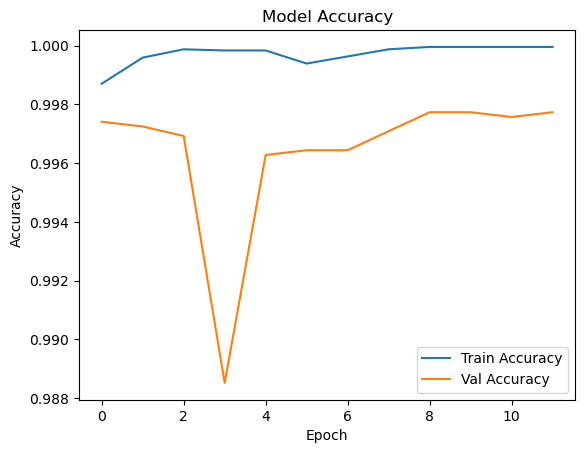

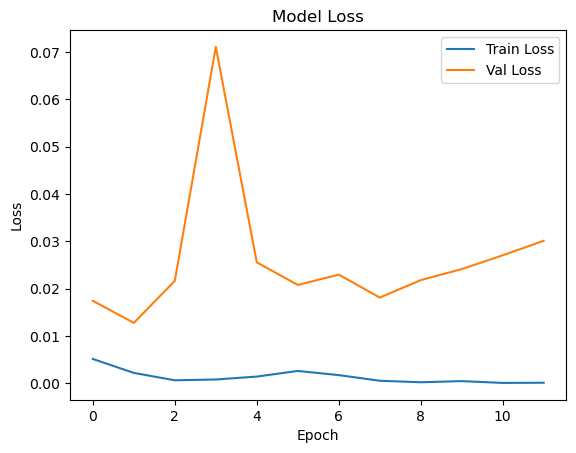

In [32]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

242/242 ━━━━━━━━━━━━━━━━━━━━ 89s 361ms/step


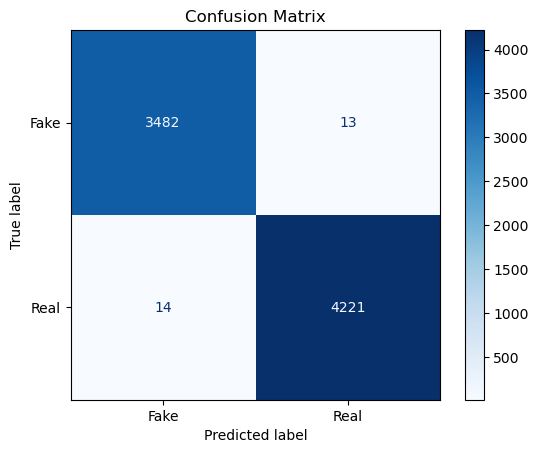

In [33]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [44]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Fake", "Real"]))

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      3495
        Real       1.00      1.00      1.00      4235

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



In [45]:
sample_text = """
NASA confirms the Earth will permanently lose gravity for 6 seconds on July 10 due to rare planetary alignment, 
urging people to stay indoors to avoid floating into the sky.

"""

In [46]:
# Tokenize
sample_seq = tokenizer.texts_to_sequences([sample_text])

# Pad
sample_pad = pad_sequences(sample_seq, maxlen=max_len)

In [47]:
# Predict the probability
prediction = model.predict(sample_pad)

# Get the probability value
prob = prediction[0][0]

# Show result with probability
if prob > 0.5:
    print(f"✅ This article is likely **REAL** news. (Confidence: {prob*100:.2f}%)")
else:
    print(f"❌ This article is likely **FAKE** news. (Confidence: {(1 - prob)*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step
❌ This article is likely **FAKE** news. (Confidence: 99.83%)


## Save the Model

In [48]:
model.save("fake_news_detection_final_model.h5")